In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Pie

In [44]:
file_name = 'C:/Users/17164/OneDrive/Desktop/spotify_top50_2021.csv'

In [45]:
df = pd.read_csv(file_name, index_col=0)

## 1. What is the correlation among features?

Use seaborn heatmap to show the correlation matrix of the dataframe. But this time, we will show only half of the matrix due to the symmetric nature of correlations.

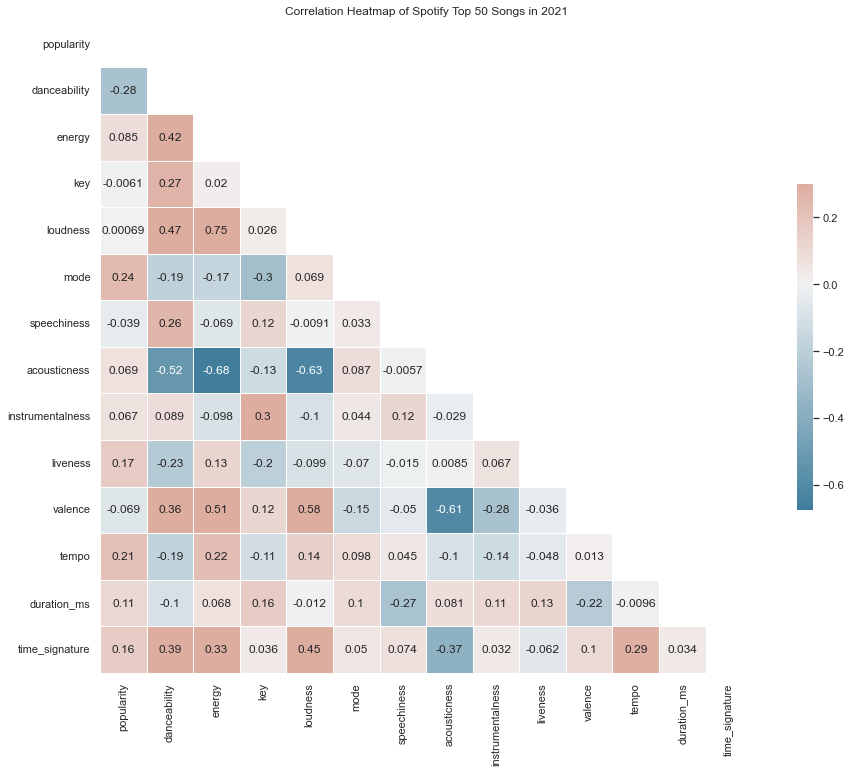

In [46]:
plt.figure(figsize=(16, 12))
sns.set(style='white')

corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap of Spotify Top 50 Songs in 2021")
plt.show()

## 2. How factors influence popularity?

We still use sns scatter plot and regplot to show the relationships between popularity and danceability. But this time, we add more features such as accusticness and liveness, to show in one chart to reveal more information about the influence factor of popularity.

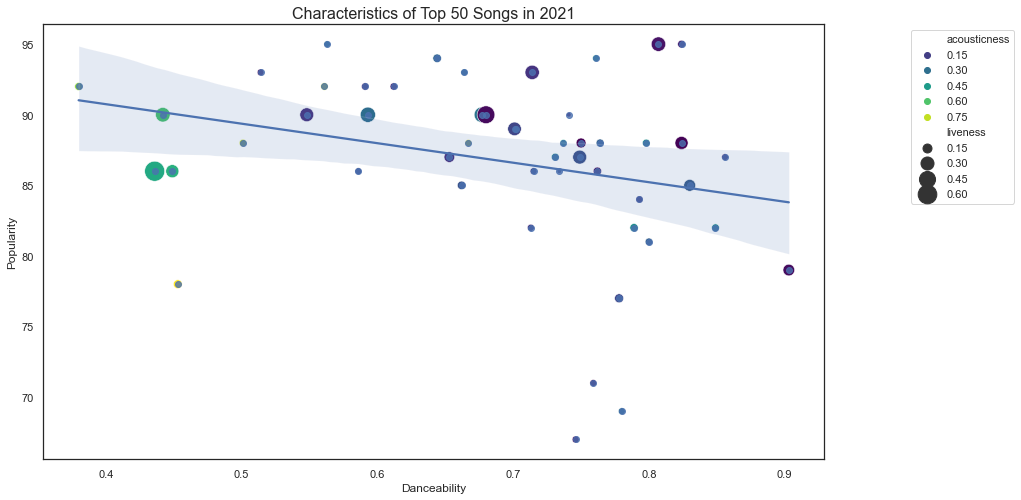

In [47]:
plt.figure(figsize=(14, 8))

# Scatter plot with different colors for acousticness and liveness
sns.scatterplot(data=df, x='danceability', y='popularity', hue='acousticness',
                size='liveness', sizes=(20, 400), palette='viridis')
sns.regplot(data=df, x="danceability", y="popularity")

plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Characteristics of Top 50 Songs in 2021', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

## 3. How is the songs distributed by key.
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. We can use the Pyecharts module to create a donut chart that displays the percentage of songs for each key. The donut chart can be helpful to visualize the distribution of songs by key, and identify any patterns or trends in the data.

In [48]:
key_counts = df.groupby("key").agg({"track_id": "count", "popularity": "sum"})

key_counts["percentage"] = key_counts["track_id"]*100 / key_counts["track_id"].sum()

donut_chart = (
    Pie()
    .add(
        "Percentage",
        list(zip(key_counts.index.astype(str), key_counts["percentage"])),
        radius=["20%", "70%"],
        label_opts=opts.LabelOpts(position="outside", formatter="{b}: {c}%"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Spotify Top 50 Songs by Key"),
        legend_opts=opts.LegendOpts(pos_bottom="0%")
    )
)

donut_chart.render_notebook()